# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [22]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

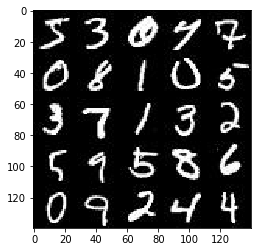

In [23]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

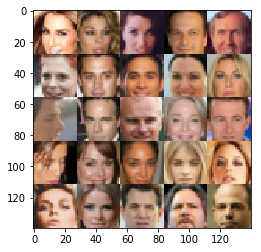

In [24]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [25]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


C:\Users\Damian\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [26]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels))
    inputs_z = tf.placeholder(tf.float32, (None, z_dim))
    lr = tf.placeholder(tf.float32, ())
    return inputs_real, inputs_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [41]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, (5, 5), (2, 2), padding='same')
        relu1 = tf.maximum(alpha*x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 128, (5, 5), (2, 2), padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha*bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, (5, 5), (2, 2), padding='valid')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha*bn3, bn3)
        
        flat = tf.reshape(relu3, (-1, 2*2*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [28]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=(not is_train)):
        
        # First fully connected layer
        x1 = tf.layers.dense(z, 2*2*512)
        
        # Reshape it to start the convolution
        x1 = tf.reshape(x1, (-1, 2, 2, 512))
        bn1 = tf.layers.batch_normalization(x1, training=is_train)
        relu1 = tf.maximum(alpha*bn1, bn1)
        # 2x2x512 now
        
        
        x2 = tf.layers.conv2d_transpose(relu1, 256, (5,5), strides=2, padding='valid')
        bn2 = tf.layers.batch_normalization(x2, training=is_train)
        relu2 = tf.maximum(alpha*bn2, bn2)
        # 6x6x256 now
        
        x3 = tf.layers.conv2d_transpose(relu2, 128, (5,5), strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=is_train)
        relu3 = tf.maximum(alpha*bn3, bn3)
        # 28x28x128 now
        
        logits = tf.layers.conv2d_transpose(relu3, out_channel_dim, (5,5), strides=2, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [37]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * 0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [30]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights and biases
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    # Optimization
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [31]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [34]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
        
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    samples, losses = [], []
    print_every = 10
    show_every = 100
    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_images = batch_images * 2
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                #print(type(batch_images), type(batch_z), type(learning_rate))
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr: learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i + 1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    n_images = 16
                    show_generator_output(sess, n_images, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.4332... Generator Loss: 8.9544
Epoch 1/2... Discriminator Loss: 0.3661... Generator Loss: 10.5020
Epoch 1/2... Discriminator Loss: 0.3810... Generator Loss: 6.4192
Epoch 1/2... Discriminator Loss: 0.4648... Generator Loss: 6.4590
Epoch 1/2... Discriminator Loss: 0.5245... Generator Loss: 1.9510
Epoch 1/2... Discriminator Loss: 0.4294... Generator Loss: 4.7169
Epoch 1/2... Discriminator Loss: 0.5910... Generator Loss: 1.7451
Epoch 1/2... Discriminator Loss: 0.6418... Generator Loss: 2.2371
Epoch 1/2... Discriminator Loss: 0.5018... Generator Loss: 2.4549
Epoch 1/2... Discriminator Loss: 0.5671... Generator Loss: 3.6968


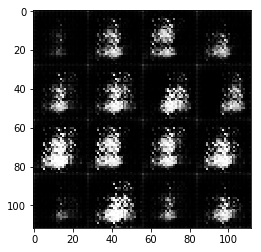

Epoch 1/2... Discriminator Loss: 0.4240... Generator Loss: 3.5677
Epoch 1/2... Discriminator Loss: 0.5002... Generator Loss: 3.4933
Epoch 1/2... Discriminator Loss: 0.4259... Generator Loss: 3.0998
Epoch 1/2... Discriminator Loss: 0.6307... Generator Loss: 1.8131
Epoch 1/2... Discriminator Loss: 0.4948... Generator Loss: 4.0186
Epoch 1/2... Discriminator Loss: 0.6981... Generator Loss: 1.4193
Epoch 1/2... Discriminator Loss: 0.5068... Generator Loss: 3.2106
Epoch 1/2... Discriminator Loss: 0.4652... Generator Loss: 3.6198
Epoch 1/2... Discriminator Loss: 0.6609... Generator Loss: 1.8688
Epoch 1/2... Discriminator Loss: 0.5776... Generator Loss: 2.2793


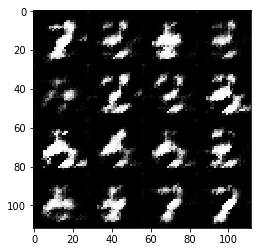

Epoch 1/2... Discriminator Loss: 0.5713... Generator Loss: 2.5486
Epoch 1/2... Discriminator Loss: 1.0718... Generator Loss: 0.9654
Epoch 1/2... Discriminator Loss: 0.6467... Generator Loss: 2.4381
Epoch 1/2... Discriminator Loss: 0.7221... Generator Loss: 2.0581
Epoch 1/2... Discriminator Loss: 1.0736... Generator Loss: 0.9370
Epoch 1/2... Discriminator Loss: 0.9947... Generator Loss: 1.0034
Epoch 1/2... Discriminator Loss: 0.6494... Generator Loss: 2.1894
Epoch 1/2... Discriminator Loss: 1.1177... Generator Loss: 1.3332
Epoch 1/2... Discriminator Loss: 0.8515... Generator Loss: 1.4571
Epoch 1/2... Discriminator Loss: 0.8363... Generator Loss: 2.5610


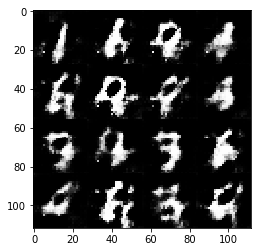

Epoch 1/2... Discriminator Loss: 0.7960... Generator Loss: 1.7748
Epoch 1/2... Discriminator Loss: 0.6542... Generator Loss: 2.3716
Epoch 1/2... Discriminator Loss: 0.5368... Generator Loss: 2.4465
Epoch 1/2... Discriminator Loss: 0.5669... Generator Loss: 2.3113
Epoch 1/2... Discriminator Loss: 0.6771... Generator Loss: 2.1475
Epoch 1/2... Discriminator Loss: 0.7757... Generator Loss: 1.4705
Epoch 1/2... Discriminator Loss: 1.1110... Generator Loss: 0.8279
Epoch 1/2... Discriminator Loss: 0.6884... Generator Loss: 1.9148
Epoch 1/2... Discriminator Loss: 0.8782... Generator Loss: 2.1033
Epoch 1/2... Discriminator Loss: 0.9751... Generator Loss: 1.0588


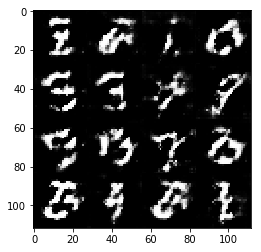

Epoch 1/2... Discriminator Loss: 0.8416... Generator Loss: 1.4613
Epoch 1/2... Discriminator Loss: 0.9242... Generator Loss: 1.3429
Epoch 1/2... Discriminator Loss: 0.7261... Generator Loss: 1.7963
Epoch 1/2... Discriminator Loss: 1.0175... Generator Loss: 1.0999
Epoch 1/2... Discriminator Loss: 0.9054... Generator Loss: 1.6122
Epoch 1/2... Discriminator Loss: 0.7850... Generator Loss: 1.9329
Epoch 1/2... Discriminator Loss: 1.0000... Generator Loss: 1.3850
Epoch 1/2... Discriminator Loss: 0.8059... Generator Loss: 1.3848
Epoch 1/2... Discriminator Loss: 0.7364... Generator Loss: 1.6687
Epoch 1/2... Discriminator Loss: 0.9920... Generator Loss: 1.2046


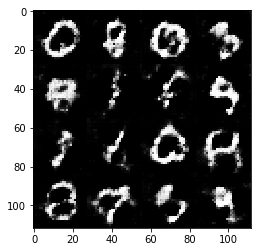

Epoch 1/2... Discriminator Loss: 0.8383... Generator Loss: 1.3884
Epoch 1/2... Discriminator Loss: 1.2345... Generator Loss: 0.7177
Epoch 1/2... Discriminator Loss: 0.9798... Generator Loss: 1.6433
Epoch 1/2... Discriminator Loss: 1.0497... Generator Loss: 1.1525
Epoch 1/2... Discriminator Loss: 0.7455... Generator Loss: 2.1080
Epoch 1/2... Discriminator Loss: 1.0030... Generator Loss: 1.9259
Epoch 1/2... Discriminator Loss: 0.8633... Generator Loss: 1.3480
Epoch 1/2... Discriminator Loss: 0.8607... Generator Loss: 1.3479
Epoch 1/2... Discriminator Loss: 0.7645... Generator Loss: 1.4709
Epoch 1/2... Discriminator Loss: 0.9976... Generator Loss: 1.4229


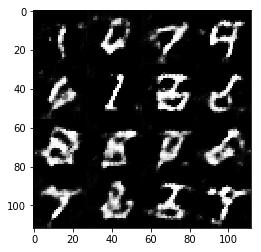

Epoch 1/2... Discriminator Loss: 0.8072... Generator Loss: 1.7486
Epoch 1/2... Discriminator Loss: 0.9038... Generator Loss: 1.3104
Epoch 1/2... Discriminator Loss: 0.8706... Generator Loss: 1.4290
Epoch 1/2... Discriminator Loss: 0.7688... Generator Loss: 1.6588
Epoch 1/2... Discriminator Loss: 0.9215... Generator Loss: 2.0125
Epoch 1/2... Discriminator Loss: 0.8472... Generator Loss: 1.4154
Epoch 1/2... Discriminator Loss: 0.8446... Generator Loss: 1.7461
Epoch 1/2... Discriminator Loss: 1.0262... Generator Loss: 1.0490
Epoch 1/2... Discriminator Loss: 0.7961... Generator Loss: 1.3685
Epoch 1/2... Discriminator Loss: 1.0094... Generator Loss: 1.4946


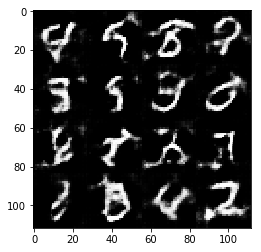

Epoch 1/2... Discriminator Loss: 1.0970... Generator Loss: 1.0787
Epoch 1/2... Discriminator Loss: 0.8486... Generator Loss: 1.4174
Epoch 1/2... Discriminator Loss: 0.9341... Generator Loss: 1.4007
Epoch 1/2... Discriminator Loss: 0.8264... Generator Loss: 1.4430
Epoch 1/2... Discriminator Loss: 0.9291... Generator Loss: 1.2069
Epoch 1/2... Discriminator Loss: 0.8350... Generator Loss: 1.4863
Epoch 1/2... Discriminator Loss: 0.8439... Generator Loss: 1.2002
Epoch 1/2... Discriminator Loss: 0.9564... Generator Loss: 1.1835
Epoch 1/2... Discriminator Loss: 0.9483... Generator Loss: 1.2509
Epoch 1/2... Discriminator Loss: 1.0254... Generator Loss: 1.0082


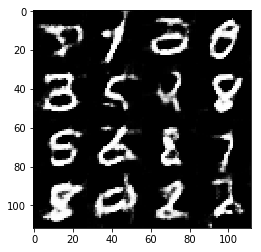

Epoch 1/2... Discriminator Loss: 0.9782... Generator Loss: 1.0772
Epoch 1/2... Discriminator Loss: 0.9956... Generator Loss: 1.0069
Epoch 1/2... Discriminator Loss: 0.9265... Generator Loss: 1.4816
Epoch 1/2... Discriminator Loss: 0.7847... Generator Loss: 1.3677
Epoch 1/2... Discriminator Loss: 1.0280... Generator Loss: 2.2891
Epoch 1/2... Discriminator Loss: 1.2728... Generator Loss: 0.7674
Epoch 1/2... Discriminator Loss: 1.2723... Generator Loss: 0.8191
Epoch 1/2... Discriminator Loss: 0.8398... Generator Loss: 1.2644
Epoch 1/2... Discriminator Loss: 1.0094... Generator Loss: 1.2740
Epoch 1/2... Discriminator Loss: 0.8716... Generator Loss: 1.2020


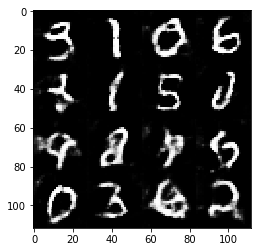

Epoch 1/2... Discriminator Loss: 0.9478... Generator Loss: 1.0577
Epoch 1/2... Discriminator Loss: 0.9144... Generator Loss: 1.0981
Epoch 1/2... Discriminator Loss: 0.9514... Generator Loss: 1.1088
Epoch 2/2... Discriminator Loss: 0.8171... Generator Loss: 1.3681
Epoch 2/2... Discriminator Loss: 0.7898... Generator Loss: 1.8991
Epoch 2/2... Discriminator Loss: 0.9562... Generator Loss: 1.0092
Epoch 2/2... Discriminator Loss: 0.9180... Generator Loss: 1.2812
Epoch 2/2... Discriminator Loss: 0.9732... Generator Loss: 1.5549
Epoch 2/2... Discriminator Loss: 0.9124... Generator Loss: 1.4775
Epoch 2/2... Discriminator Loss: 0.9490... Generator Loss: 1.6229


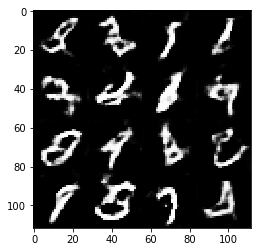

Epoch 2/2... Discriminator Loss: 0.8288... Generator Loss: 1.8484
Epoch 2/2... Discriminator Loss: 0.8418... Generator Loss: 1.3364
Epoch 2/2... Discriminator Loss: 0.8308... Generator Loss: 1.7090
Epoch 2/2... Discriminator Loss: 1.0716... Generator Loss: 0.8716
Epoch 2/2... Discriminator Loss: 0.9663... Generator Loss: 1.2503
Epoch 2/2... Discriminator Loss: 0.8445... Generator Loss: 1.3398
Epoch 2/2... Discriminator Loss: 0.8103... Generator Loss: 1.8171
Epoch 2/2... Discriminator Loss: 1.0348... Generator Loss: 0.9146
Epoch 2/2... Discriminator Loss: 0.8994... Generator Loss: 1.0964
Epoch 2/2... Discriminator Loss: 1.2192... Generator Loss: 0.6524


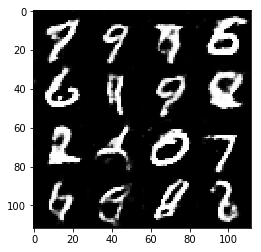

Epoch 2/2... Discriminator Loss: 0.7561... Generator Loss: 1.4501
Epoch 2/2... Discriminator Loss: 1.0416... Generator Loss: 0.8917
Epoch 2/2... Discriminator Loss: 0.7443... Generator Loss: 2.1151
Epoch 2/2... Discriminator Loss: 0.8802... Generator Loss: 1.1554
Epoch 2/2... Discriminator Loss: 0.9367... Generator Loss: 1.0605
Epoch 2/2... Discriminator Loss: 0.8572... Generator Loss: 1.1566
Epoch 2/2... Discriminator Loss: 0.9745... Generator Loss: 1.2673
Epoch 2/2... Discriminator Loss: 1.1098... Generator Loss: 0.7609
Epoch 2/2... Discriminator Loss: 1.9544... Generator Loss: 0.3103
Epoch 2/2... Discriminator Loss: 0.8428... Generator Loss: 1.1960


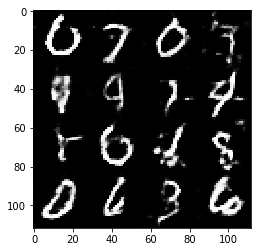

Epoch 2/2... Discriminator Loss: 0.8046... Generator Loss: 1.1880
Epoch 2/2... Discriminator Loss: 0.7130... Generator Loss: 1.4817
Epoch 2/2... Discriminator Loss: 1.0124... Generator Loss: 1.6530
Epoch 2/2... Discriminator Loss: 0.9256... Generator Loss: 1.0257
Epoch 2/2... Discriminator Loss: 0.9102... Generator Loss: 1.4433
Epoch 2/2... Discriminator Loss: 1.5728... Generator Loss: 2.6906
Epoch 2/2... Discriminator Loss: 0.8992... Generator Loss: 1.0177
Epoch 2/2... Discriminator Loss: 1.0486... Generator Loss: 0.8128
Epoch 2/2... Discriminator Loss: 1.2145... Generator Loss: 0.7231
Epoch 2/2... Discriminator Loss: 0.8689... Generator Loss: 1.4702


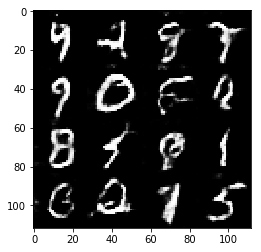

Epoch 2/2... Discriminator Loss: 0.7764... Generator Loss: 1.3333
Epoch 2/2... Discriminator Loss: 1.2925... Generator Loss: 2.0028
Epoch 2/2... Discriminator Loss: 0.8973... Generator Loss: 1.0485
Epoch 2/2... Discriminator Loss: 0.9918... Generator Loss: 2.2574
Epoch 2/2... Discriminator Loss: 1.0453... Generator Loss: 1.0590
Epoch 2/2... Discriminator Loss: 1.0682... Generator Loss: 0.8020
Epoch 2/2... Discriminator Loss: 1.0973... Generator Loss: 0.8693
Epoch 2/2... Discriminator Loss: 0.8060... Generator Loss: 1.3704
Epoch 2/2... Discriminator Loss: 1.0484... Generator Loss: 1.8999
Epoch 2/2... Discriminator Loss: 1.2065... Generator Loss: 2.5610


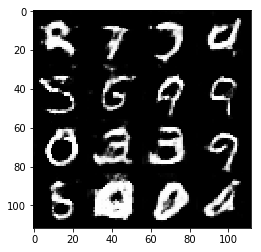

Epoch 2/2... Discriminator Loss: 0.8206... Generator Loss: 1.2536
Epoch 2/2... Discriminator Loss: 0.9431... Generator Loss: 1.1557
Epoch 2/2... Discriminator Loss: 0.9691... Generator Loss: 1.0190
Epoch 2/2... Discriminator Loss: 0.7131... Generator Loss: 1.4687
Epoch 2/2... Discriminator Loss: 1.0645... Generator Loss: 1.2382
Epoch 2/2... Discriminator Loss: 0.9537... Generator Loss: 1.1765
Epoch 2/2... Discriminator Loss: 0.7911... Generator Loss: 1.2299
Epoch 2/2... Discriminator Loss: 0.8353... Generator Loss: 1.1052
Epoch 2/2... Discriminator Loss: 0.8100... Generator Loss: 1.1972
Epoch 2/2... Discriminator Loss: 0.8944... Generator Loss: 1.1929


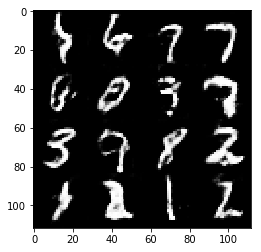

Epoch 2/2... Discriminator Loss: 0.8323... Generator Loss: 1.3539
Epoch 2/2... Discriminator Loss: 0.8010... Generator Loss: 1.1952
Epoch 2/2... Discriminator Loss: 0.7133... Generator Loss: 2.1245
Epoch 2/2... Discriminator Loss: 0.8710... Generator Loss: 1.1528
Epoch 2/2... Discriminator Loss: 0.8439... Generator Loss: 1.1409
Epoch 2/2... Discriminator Loss: 0.8260... Generator Loss: 1.7029
Epoch 2/2... Discriminator Loss: 1.3910... Generator Loss: 0.5456
Epoch 2/2... Discriminator Loss: 0.9610... Generator Loss: 0.9445
Epoch 2/2... Discriminator Loss: 0.8953... Generator Loss: 1.4073
Epoch 2/2... Discriminator Loss: 0.9130... Generator Loss: 1.6613


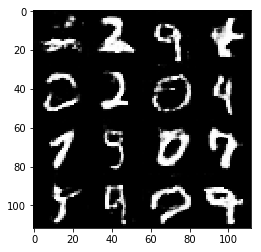

Epoch 2/2... Discriminator Loss: 0.9674... Generator Loss: 0.9364
Epoch 2/2... Discriminator Loss: 0.9688... Generator Loss: 0.9294
Epoch 2/2... Discriminator Loss: 1.0745... Generator Loss: 0.8614
Epoch 2/2... Discriminator Loss: 0.9464... Generator Loss: 1.4155
Epoch 2/2... Discriminator Loss: 0.9854... Generator Loss: 0.9589
Epoch 2/2... Discriminator Loss: 0.8126... Generator Loss: 1.1720
Epoch 2/2... Discriminator Loss: 1.1454... Generator Loss: 0.7632
Epoch 2/2... Discriminator Loss: 0.8784... Generator Loss: 2.2494
Epoch 2/2... Discriminator Loss: 0.8931... Generator Loss: 1.0736
Epoch 2/2... Discriminator Loss: 1.3413... Generator Loss: 0.5755


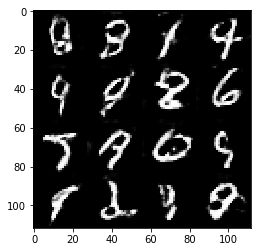

Epoch 2/2... Discriminator Loss: 1.5343... Generator Loss: 0.4880
Epoch 2/2... Discriminator Loss: 0.8263... Generator Loss: 1.3955
Epoch 2/2... Discriminator Loss: 0.9599... Generator Loss: 1.1040
Epoch 2/2... Discriminator Loss: 0.7395... Generator Loss: 1.5516
Epoch 2/2... Discriminator Loss: 0.9047... Generator Loss: 1.9512
Epoch 2/2... Discriminator Loss: 0.6702... Generator Loss: 1.7393
Epoch 2/2... Discriminator Loss: 1.5011... Generator Loss: 0.5043
Epoch 2/2... Discriminator Loss: 1.0759... Generator Loss: 0.9177
Epoch 2/2... Discriminator Loss: 0.7302... Generator Loss: 1.8101
Epoch 2/2... Discriminator Loss: 1.1341... Generator Loss: 1.4805


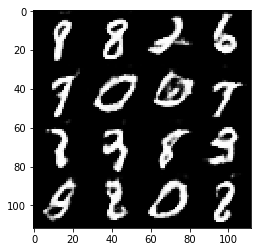

Epoch 2/2... Discriminator Loss: 1.1562... Generator Loss: 0.9034
Epoch 2/2... Discriminator Loss: 0.9931... Generator Loss: 0.9263
Epoch 2/2... Discriminator Loss: 1.3862... Generator Loss: 0.5748
Epoch 2/2... Discriminator Loss: 0.9332... Generator Loss: 1.0655
Epoch 2/2... Discriminator Loss: 0.9163... Generator Loss: 1.1188
Epoch 2/2... Discriminator Loss: 0.8004... Generator Loss: 1.4212
Epoch 2/2... Discriminator Loss: 0.9152... Generator Loss: 0.9882


In [42]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.6231... Generator Loss: 0.4557
Epoch 1/1... Discriminator Loss: 0.4953... Generator Loss: 7.5080
Epoch 1/1... Discriminator Loss: 0.4122... Generator Loss: 8.8276
Epoch 1/1... Discriminator Loss: 0.4992... Generator Loss: 10.3664
Epoch 1/1... Discriminator Loss: 0.4340... Generator Loss: 2.7037
Epoch 1/1... Discriminator Loss: 0.3615... Generator Loss: 4.3240
Epoch 1/1... Discriminator Loss: 0.3565... Generator Loss: 7.3202
Epoch 1/1... Discriminator Loss: 0.4291... Generator Loss: 2.6258
Epoch 1/1... Discriminator Loss: 1.2564... Generator Loss: 8.3498
Epoch 1/1... Discriminator Loss: 0.7751... Generator Loss: 2.7497


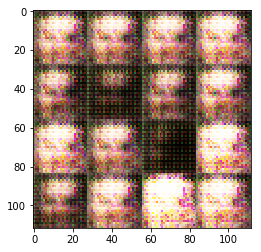

Epoch 1/1... Discriminator Loss: 0.7068... Generator Loss: 1.7889
Epoch 1/1... Discriminator Loss: 0.8099... Generator Loss: 1.2563
Epoch 1/1... Discriminator Loss: 0.5300... Generator Loss: 1.9415
Epoch 1/1... Discriminator Loss: 0.8294... Generator Loss: 3.4944
Epoch 1/1... Discriminator Loss: 0.9593... Generator Loss: 2.9849
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 3.8543
Epoch 1/1... Discriminator Loss: 1.0329... Generator Loss: 0.9809
Epoch 1/1... Discriminator Loss: 1.0614... Generator Loss: 1.2084
Epoch 1/1... Discriminator Loss: 1.0936... Generator Loss: 1.5234
Epoch 1/1... Discriminator Loss: 1.0319... Generator Loss: 0.9962


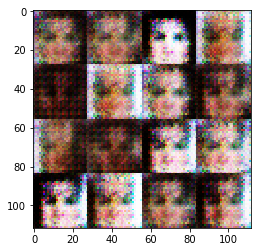

Epoch 1/1... Discriminator Loss: 1.5137... Generator Loss: 2.1288
Epoch 1/1... Discriminator Loss: 1.0862... Generator Loss: 0.9734
Epoch 1/1... Discriminator Loss: 1.1313... Generator Loss: 1.4307
Epoch 1/1... Discriminator Loss: 1.3008... Generator Loss: 1.3892
Epoch 1/1... Discriminator Loss: 1.2309... Generator Loss: 1.0497
Epoch 1/1... Discriminator Loss: 0.9549... Generator Loss: 1.3870
Epoch 1/1... Discriminator Loss: 1.4187... Generator Loss: 0.7947
Epoch 1/1... Discriminator Loss: 0.9613... Generator Loss: 1.1306
Epoch 1/1... Discriminator Loss: 1.1387... Generator Loss: 1.0768
Epoch 1/1... Discriminator Loss: 1.0354... Generator Loss: 1.2644


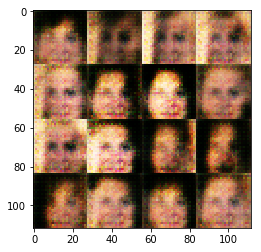

Epoch 1/1... Discriminator Loss: 1.1058... Generator Loss: 0.9932
Epoch 1/1... Discriminator Loss: 1.3656... Generator Loss: 0.7521
Epoch 1/1... Discriminator Loss: 1.1832... Generator Loss: 1.0728
Epoch 1/1... Discriminator Loss: 1.3986... Generator Loss: 0.6029
Epoch 1/1... Discriminator Loss: 1.3237... Generator Loss: 0.9095
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.8909
Epoch 1/1... Discriminator Loss: 1.0169... Generator Loss: 1.1142
Epoch 1/1... Discriminator Loss: 1.3492... Generator Loss: 0.7472
Epoch 1/1... Discriminator Loss: 1.0839... Generator Loss: 1.0113
Epoch 1/1... Discriminator Loss: 1.2339... Generator Loss: 1.1068


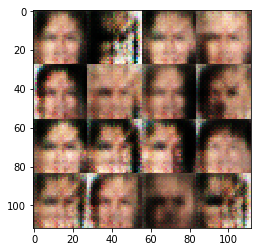

Epoch 1/1... Discriminator Loss: 1.0211... Generator Loss: 1.1205
Epoch 1/1... Discriminator Loss: 0.9610... Generator Loss: 1.2542
Epoch 1/1... Discriminator Loss: 1.0224... Generator Loss: 1.4660
Epoch 1/1... Discriminator Loss: 1.3145... Generator Loss: 0.8218
Epoch 1/1... Discriminator Loss: 1.3414... Generator Loss: 1.0995
Epoch 1/1... Discriminator Loss: 1.3850... Generator Loss: 0.8218
Epoch 1/1... Discriminator Loss: 0.9542... Generator Loss: 1.2580
Epoch 1/1... Discriminator Loss: 1.1495... Generator Loss: 0.9891
Epoch 1/1... Discriminator Loss: 1.1108... Generator Loss: 1.7475
Epoch 1/1... Discriminator Loss: 1.0756... Generator Loss: 0.9952


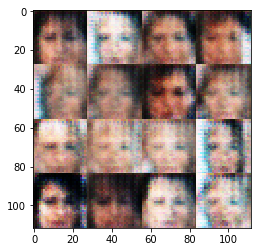

Epoch 1/1... Discriminator Loss: 1.1438... Generator Loss: 0.9706
Epoch 1/1... Discriminator Loss: 1.2354... Generator Loss: 1.1529
Epoch 1/1... Discriminator Loss: 1.0044... Generator Loss: 0.9999
Epoch 1/1... Discriminator Loss: 1.1146... Generator Loss: 0.9915
Epoch 1/1... Discriminator Loss: 0.9899... Generator Loss: 1.3572
Epoch 1/1... Discriminator Loss: 1.2924... Generator Loss: 0.8661
Epoch 1/1... Discriminator Loss: 0.9615... Generator Loss: 1.1297
Epoch 1/1... Discriminator Loss: 0.8843... Generator Loss: 1.2485
Epoch 1/1... Discriminator Loss: 1.0246... Generator Loss: 1.4737
Epoch 1/1... Discriminator Loss: 1.1636... Generator Loss: 0.8264


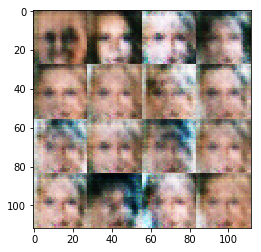

Epoch 1/1... Discriminator Loss: 1.1007... Generator Loss: 1.4832
Epoch 1/1... Discriminator Loss: 1.0929... Generator Loss: 0.8927
Epoch 1/1... Discriminator Loss: 1.1461... Generator Loss: 1.0508
Epoch 1/1... Discriminator Loss: 1.1651... Generator Loss: 0.9304
Epoch 1/1... Discriminator Loss: 1.0747... Generator Loss: 1.3321
Epoch 1/1... Discriminator Loss: 1.1108... Generator Loss: 1.0287
Epoch 1/1... Discriminator Loss: 0.9538... Generator Loss: 1.3756
Epoch 1/1... Discriminator Loss: 0.9851... Generator Loss: 1.3283
Epoch 1/1... Discriminator Loss: 1.0813... Generator Loss: 0.9834
Epoch 1/1... Discriminator Loss: 1.1441... Generator Loss: 0.8563


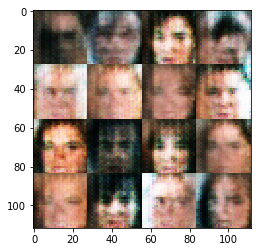

Epoch 1/1... Discriminator Loss: 1.2489... Generator Loss: 0.8409
Epoch 1/1... Discriminator Loss: 1.1116... Generator Loss: 0.9470
Epoch 1/1... Discriminator Loss: 1.0498... Generator Loss: 0.9916
Epoch 1/1... Discriminator Loss: 0.9635... Generator Loss: 1.2771
Epoch 1/1... Discriminator Loss: 1.2128... Generator Loss: 0.8239
Epoch 1/1... Discriminator Loss: 1.1411... Generator Loss: 1.0525
Epoch 1/1... Discriminator Loss: 1.1652... Generator Loss: 1.0275
Epoch 1/1... Discriminator Loss: 1.0957... Generator Loss: 0.9950
Epoch 1/1... Discriminator Loss: 1.1813... Generator Loss: 0.9654
Epoch 1/1... Discriminator Loss: 1.2057... Generator Loss: 0.8659


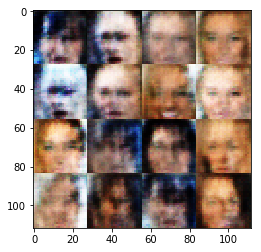

Epoch 1/1... Discriminator Loss: 1.4442... Generator Loss: 0.7549
Epoch 1/1... Discriminator Loss: 1.1523... Generator Loss: 1.0248
Epoch 1/1... Discriminator Loss: 1.3545... Generator Loss: 0.6849
Epoch 1/1... Discriminator Loss: 1.3857... Generator Loss: 0.5742
Epoch 1/1... Discriminator Loss: 1.0029... Generator Loss: 1.2673
Epoch 1/1... Discriminator Loss: 1.4072... Generator Loss: 0.6641
Epoch 1/1... Discriminator Loss: 1.0304... Generator Loss: 1.2569
Epoch 1/1... Discriminator Loss: 1.1823... Generator Loss: 0.8240
Epoch 1/1... Discriminator Loss: 1.2891... Generator Loss: 0.6334
Epoch 1/1... Discriminator Loss: 1.1341... Generator Loss: 0.9662


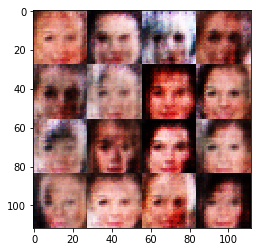

Epoch 1/1... Discriminator Loss: 1.4088... Generator Loss: 0.5228
Epoch 1/1... Discriminator Loss: 1.2023... Generator Loss: 1.1522
Epoch 1/1... Discriminator Loss: 1.1118... Generator Loss: 1.2509
Epoch 1/1... Discriminator Loss: 1.1651... Generator Loss: 1.1476
Epoch 1/1... Discriminator Loss: 1.0766... Generator Loss: 1.6237
Epoch 1/1... Discriminator Loss: 1.0688... Generator Loss: 0.9532
Epoch 1/1... Discriminator Loss: 1.1413... Generator Loss: 0.8117
Epoch 1/1... Discriminator Loss: 1.1611... Generator Loss: 1.0076
Epoch 1/1... Discriminator Loss: 1.1520... Generator Loss: 1.1796
Epoch 1/1... Discriminator Loss: 1.1049... Generator Loss: 1.3509


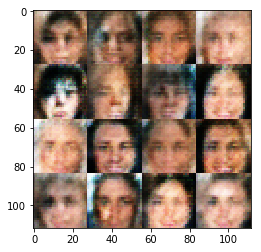

Epoch 1/1... Discriminator Loss: 1.0911... Generator Loss: 0.9043
Epoch 1/1... Discriminator Loss: 0.9726... Generator Loss: 0.9680
Epoch 1/1... Discriminator Loss: 1.3432... Generator Loss: 0.6617
Epoch 1/1... Discriminator Loss: 0.9471... Generator Loss: 1.0756
Epoch 1/1... Discriminator Loss: 1.0116... Generator Loss: 1.0637
Epoch 1/1... Discriminator Loss: 1.3973... Generator Loss: 1.8461
Epoch 1/1... Discriminator Loss: 1.2611... Generator Loss: 1.9178
Epoch 1/1... Discriminator Loss: 1.1185... Generator Loss: 1.0415
Epoch 1/1... Discriminator Loss: 1.1815... Generator Loss: 0.8465
Epoch 1/1... Discriminator Loss: 1.1616... Generator Loss: 0.8066


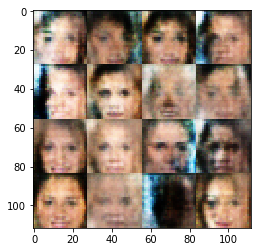

Epoch 1/1... Discriminator Loss: 1.1922... Generator Loss: 1.2004
Epoch 1/1... Discriminator Loss: 1.0217... Generator Loss: 1.2880
Epoch 1/1... Discriminator Loss: 1.0966... Generator Loss: 0.8962
Epoch 1/1... Discriminator Loss: 1.1406... Generator Loss: 0.8627
Epoch 1/1... Discriminator Loss: 1.0571... Generator Loss: 0.8897
Epoch 1/1... Discriminator Loss: 1.1365... Generator Loss: 0.8217
Epoch 1/1... Discriminator Loss: 1.1610... Generator Loss: 1.0751
Epoch 1/1... Discriminator Loss: 1.1877... Generator Loss: 1.0388
Epoch 1/1... Discriminator Loss: 1.2488... Generator Loss: 0.7244
Epoch 1/1... Discriminator Loss: 1.0475... Generator Loss: 1.1229


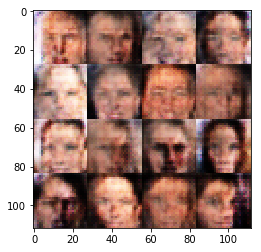

Epoch 1/1... Discriminator Loss: 1.0308... Generator Loss: 1.0553
Epoch 1/1... Discriminator Loss: 1.1369... Generator Loss: 0.9337
Epoch 1/1... Discriminator Loss: 1.0760... Generator Loss: 1.3081
Epoch 1/1... Discriminator Loss: 1.0277... Generator Loss: 1.0438
Epoch 1/1... Discriminator Loss: 1.1433... Generator Loss: 1.0012
Epoch 1/1... Discriminator Loss: 1.0338... Generator Loss: 1.3664
Epoch 1/1... Discriminator Loss: 1.0565... Generator Loss: 0.9871
Epoch 1/1... Discriminator Loss: 1.3397... Generator Loss: 0.6989
Epoch 1/1... Discriminator Loss: 1.1222... Generator Loss: 1.0151
Epoch 1/1... Discriminator Loss: 1.0688... Generator Loss: 1.2360


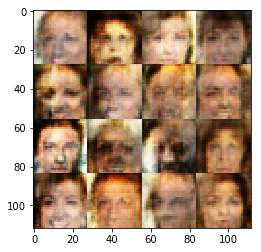

Epoch 1/1... Discriminator Loss: 1.1513... Generator Loss: 1.2483
Epoch 1/1... Discriminator Loss: 1.0749... Generator Loss: 0.8678
Epoch 1/1... Discriminator Loss: 1.1568... Generator Loss: 1.8085
Epoch 1/1... Discriminator Loss: 1.1459... Generator Loss: 1.0082
Epoch 1/1... Discriminator Loss: 1.0704... Generator Loss: 0.9818
Epoch 1/1... Discriminator Loss: 1.0103... Generator Loss: 1.1118
Epoch 1/1... Discriminator Loss: 1.0797... Generator Loss: 1.1667
Epoch 1/1... Discriminator Loss: 1.0292... Generator Loss: 1.2230
Epoch 1/1... Discriminator Loss: 0.9398... Generator Loss: 1.4937
Epoch 1/1... Discriminator Loss: 0.9700... Generator Loss: 1.3147


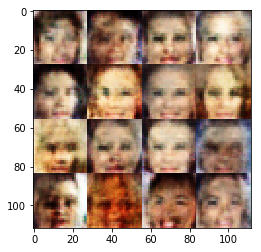

Epoch 1/1... Discriminator Loss: 0.9102... Generator Loss: 1.2589
Epoch 1/1... Discriminator Loss: 1.1276... Generator Loss: 0.8994
Epoch 1/1... Discriminator Loss: 1.0647... Generator Loss: 1.0993
Epoch 1/1... Discriminator Loss: 1.1041... Generator Loss: 0.8861
Epoch 1/1... Discriminator Loss: 1.1610... Generator Loss: 1.4439
Epoch 1/1... Discriminator Loss: 0.9749... Generator Loss: 1.1333
Epoch 1/1... Discriminator Loss: 1.2334... Generator Loss: 1.3721
Epoch 1/1... Discriminator Loss: 1.0653... Generator Loss: 0.8185
Epoch 1/1... Discriminator Loss: 1.1668... Generator Loss: 1.0753
Epoch 1/1... Discriminator Loss: 1.0615... Generator Loss: 1.9048


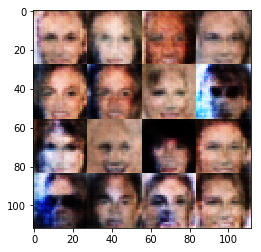

Epoch 1/1... Discriminator Loss: 1.0591... Generator Loss: 1.3802
Epoch 1/1... Discriminator Loss: 1.0312... Generator Loss: 1.1646
Epoch 1/1... Discriminator Loss: 1.0868... Generator Loss: 1.1284
Epoch 1/1... Discriminator Loss: 1.0631... Generator Loss: 1.0420
Epoch 1/1... Discriminator Loss: 0.9667... Generator Loss: 1.2961
Epoch 1/1... Discriminator Loss: 1.0993... Generator Loss: 1.1891
Epoch 1/1... Discriminator Loss: 0.9899... Generator Loss: 1.2889
Epoch 1/1... Discriminator Loss: 1.1844... Generator Loss: 2.0122
Epoch 1/1... Discriminator Loss: 1.2443... Generator Loss: 0.8875
Epoch 1/1... Discriminator Loss: 1.0441... Generator Loss: 1.1066


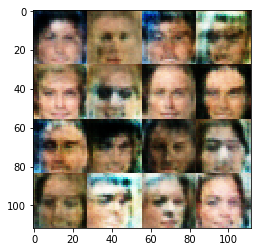

Epoch 1/1... Discriminator Loss: 1.0221... Generator Loss: 1.0919
Epoch 1/1... Discriminator Loss: 0.9326... Generator Loss: 1.2311
Epoch 1/1... Discriminator Loss: 0.9841... Generator Loss: 1.1557
Epoch 1/1... Discriminator Loss: 1.0996... Generator Loss: 0.7742
Epoch 1/1... Discriminator Loss: 1.0131... Generator Loss: 1.0194
Epoch 1/1... Discriminator Loss: 0.9418... Generator Loss: 1.5360
Epoch 1/1... Discriminator Loss: 0.9623... Generator Loss: 1.3202
Epoch 1/1... Discriminator Loss: 1.3720... Generator Loss: 2.6440
Epoch 1/1... Discriminator Loss: 1.1077... Generator Loss: 0.9734
Epoch 1/1... Discriminator Loss: 1.1221... Generator Loss: 0.8302


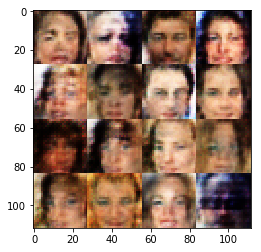

Epoch 1/1... Discriminator Loss: 1.1424... Generator Loss: 1.1105
Epoch 1/1... Discriminator Loss: 1.1340... Generator Loss: 1.0790
Epoch 1/1... Discriminator Loss: 1.0288... Generator Loss: 1.5398
Epoch 1/1... Discriminator Loss: 1.0504... Generator Loss: 1.3084
Epoch 1/1... Discriminator Loss: 1.8552... Generator Loss: 2.7650
Epoch 1/1... Discriminator Loss: 1.1691... Generator Loss: 0.9632
Epoch 1/1... Discriminator Loss: 1.0963... Generator Loss: 1.0530
Epoch 1/1... Discriminator Loss: 1.0787... Generator Loss: 1.1672
Epoch 1/1... Discriminator Loss: 1.0769... Generator Loss: 0.9663
Epoch 1/1... Discriminator Loss: 1.3140... Generator Loss: 0.6705


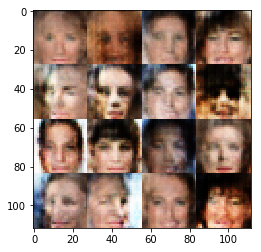

Epoch 1/1... Discriminator Loss: 0.9883... Generator Loss: 1.3499
Epoch 1/1... Discriminator Loss: 1.0885... Generator Loss: 0.9479
Epoch 1/1... Discriminator Loss: 1.0262... Generator Loss: 1.3245
Epoch 1/1... Discriminator Loss: 1.0890... Generator Loss: 1.0020
Epoch 1/1... Discriminator Loss: 0.9783... Generator Loss: 1.0562
Epoch 1/1... Discriminator Loss: 1.0621... Generator Loss: 1.0208
Epoch 1/1... Discriminator Loss: 1.0732... Generator Loss: 0.9495
Epoch 1/1... Discriminator Loss: 1.1512... Generator Loss: 1.2433
Epoch 1/1... Discriminator Loss: 1.0163... Generator Loss: 1.3048
Epoch 1/1... Discriminator Loss: 1.1445... Generator Loss: 0.7771


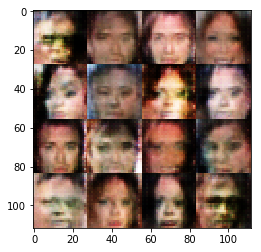

Epoch 1/1... Discriminator Loss: 0.9217... Generator Loss: 1.1379
Epoch 1/1... Discriminator Loss: 1.3915... Generator Loss: 0.5597
Epoch 1/1... Discriminator Loss: 1.0530... Generator Loss: 1.0069
Epoch 1/1... Discriminator Loss: 0.9120... Generator Loss: 1.1142
Epoch 1/1... Discriminator Loss: 1.0487... Generator Loss: 1.4481
Epoch 1/1... Discriminator Loss: 0.9681... Generator Loss: 1.2705
Epoch 1/1... Discriminator Loss: 1.0348... Generator Loss: 1.2761
Epoch 1/1... Discriminator Loss: 0.9532... Generator Loss: 1.1060
Epoch 1/1... Discriminator Loss: 1.1857... Generator Loss: 0.7588
Epoch 1/1... Discriminator Loss: 0.9961... Generator Loss: 1.0351


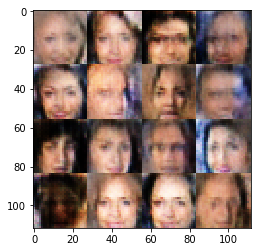

Epoch 1/1... Discriminator Loss: 0.9959... Generator Loss: 1.1224
Epoch 1/1... Discriminator Loss: 1.2934... Generator Loss: 0.6277
Epoch 1/1... Discriminator Loss: 1.4044... Generator Loss: 0.6240
Epoch 1/1... Discriminator Loss: 1.1147... Generator Loss: 0.8761
Epoch 1/1... Discriminator Loss: 1.0044... Generator Loss: 1.4893
Epoch 1/1... Discriminator Loss: 0.9699... Generator Loss: 1.1709
Epoch 1/1... Discriminator Loss: 1.2180... Generator Loss: 0.6987
Epoch 1/1... Discriminator Loss: 1.0575... Generator Loss: 1.0336
Epoch 1/1... Discriminator Loss: 1.2262... Generator Loss: 0.7967
Epoch 1/1... Discriminator Loss: 1.1856... Generator Loss: 0.7465


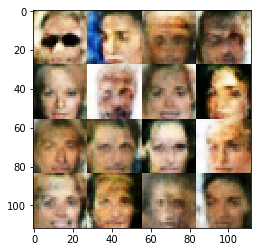

Epoch 1/1... Discriminator Loss: 1.3930... Generator Loss: 0.5438
Epoch 1/1... Discriminator Loss: 0.9744... Generator Loss: 1.1581
Epoch 1/1... Discriminator Loss: 0.9614... Generator Loss: 1.4853
Epoch 1/1... Discriminator Loss: 0.9887... Generator Loss: 0.9934
Epoch 1/1... Discriminator Loss: 0.9578... Generator Loss: 1.0111
Epoch 1/1... Discriminator Loss: 1.3262... Generator Loss: 0.6872
Epoch 1/1... Discriminator Loss: 1.0362... Generator Loss: 1.1053
Epoch 1/1... Discriminator Loss: 1.0987... Generator Loss: 1.1123
Epoch 1/1... Discriminator Loss: 1.0647... Generator Loss: 1.1280
Epoch 1/1... Discriminator Loss: 0.9580... Generator Loss: 1.4035


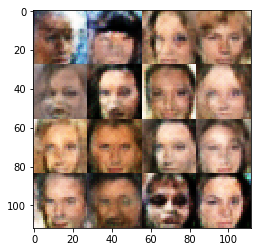

Epoch 1/1... Discriminator Loss: 1.0179... Generator Loss: 0.9129
Epoch 1/1... Discriminator Loss: 0.9486... Generator Loss: 0.9586
Epoch 1/1... Discriminator Loss: 1.1284... Generator Loss: 1.0527
Epoch 1/1... Discriminator Loss: 0.9617... Generator Loss: 1.0652
Epoch 1/1... Discriminator Loss: 1.1297... Generator Loss: 0.8846
Epoch 1/1... Discriminator Loss: 1.0153... Generator Loss: 1.0820
Epoch 1/1... Discriminator Loss: 1.4258... Generator Loss: 0.5479
Epoch 1/1... Discriminator Loss: 1.2078... Generator Loss: 0.9930
Epoch 1/1... Discriminator Loss: 0.9455... Generator Loss: 1.2131
Epoch 1/1... Discriminator Loss: 0.9024... Generator Loss: 1.5036


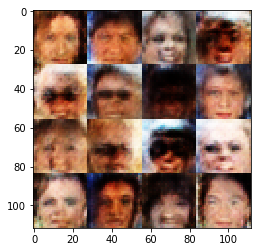

Epoch 1/1... Discriminator Loss: 1.0722... Generator Loss: 1.0094
Epoch 1/1... Discriminator Loss: 0.9792... Generator Loss: 1.1750
Epoch 1/1... Discriminator Loss: 1.1163... Generator Loss: 0.7730
Epoch 1/1... Discriminator Loss: 0.9642... Generator Loss: 1.1751
Epoch 1/1... Discriminator Loss: 1.0186... Generator Loss: 1.0317
Epoch 1/1... Discriminator Loss: 1.0155... Generator Loss: 1.4963
Epoch 1/1... Discriminator Loss: 1.5926... Generator Loss: 0.4129
Epoch 1/1... Discriminator Loss: 1.2968... Generator Loss: 0.5943
Epoch 1/1... Discriminator Loss: 0.9109... Generator Loss: 1.2216
Epoch 1/1... Discriminator Loss: 0.9730... Generator Loss: 1.4871


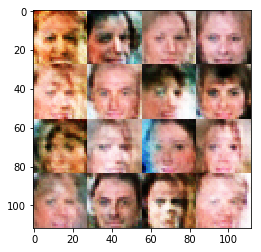

Epoch 1/1... Discriminator Loss: 0.8457... Generator Loss: 1.5708
Epoch 1/1... Discriminator Loss: 1.1509... Generator Loss: 0.7257
Epoch 1/1... Discriminator Loss: 0.9195... Generator Loss: 1.1948
Epoch 1/1... Discriminator Loss: 0.8979... Generator Loss: 1.2155
Epoch 1/1... Discriminator Loss: 1.0599... Generator Loss: 1.3583
Epoch 1/1... Discriminator Loss: 1.1216... Generator Loss: 0.7383
Epoch 1/1... Discriminator Loss: 1.0272... Generator Loss: 1.3528
Epoch 1/1... Discriminator Loss: 1.3808... Generator Loss: 0.5534
Epoch 1/1... Discriminator Loss: 0.9448... Generator Loss: 1.6295
Epoch 1/1... Discriminator Loss: 0.9762... Generator Loss: 1.2997


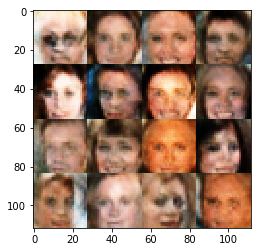

Epoch 1/1... Discriminator Loss: 0.9485... Generator Loss: 1.1592
Epoch 1/1... Discriminator Loss: 1.2742... Generator Loss: 1.5440
Epoch 1/1... Discriminator Loss: 0.8641... Generator Loss: 1.4458
Epoch 1/1... Discriminator Loss: 0.9996... Generator Loss: 0.9648
Epoch 1/1... Discriminator Loss: 1.1074... Generator Loss: 0.9193
Epoch 1/1... Discriminator Loss: 0.9000... Generator Loss: 1.3870
Epoch 1/1... Discriminator Loss: 0.8994... Generator Loss: 1.3382
Epoch 1/1... Discriminator Loss: 1.1369... Generator Loss: 0.8007
Epoch 1/1... Discriminator Loss: 0.9617... Generator Loss: 1.0214
Epoch 1/1... Discriminator Loss: 1.0661... Generator Loss: 1.0292


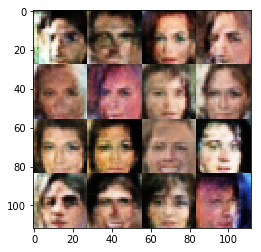

Epoch 1/1... Discriminator Loss: 0.8470... Generator Loss: 1.4708
Epoch 1/1... Discriminator Loss: 1.2166... Generator Loss: 0.9496
Epoch 1/1... Discriminator Loss: 1.1471... Generator Loss: 1.4183
Epoch 1/1... Discriminator Loss: 1.0499... Generator Loss: 1.1376
Epoch 1/1... Discriminator Loss: 0.9634... Generator Loss: 1.0613
Epoch 1/1... Discriminator Loss: 1.0662... Generator Loss: 1.2044
Epoch 1/1... Discriminator Loss: 0.9711... Generator Loss: 1.3075
Epoch 1/1... Discriminator Loss: 1.1110... Generator Loss: 0.8294
Epoch 1/1... Discriminator Loss: 1.1066... Generator Loss: 0.8465
Epoch 1/1... Discriminator Loss: 0.8478... Generator Loss: 1.4758


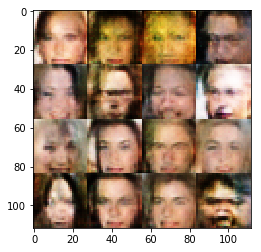

Epoch 1/1... Discriminator Loss: 0.9453... Generator Loss: 1.4363
Epoch 1/1... Discriminator Loss: 1.3077... Generator Loss: 0.6207
Epoch 1/1... Discriminator Loss: 1.1593... Generator Loss: 0.7796
Epoch 1/1... Discriminator Loss: 1.1359... Generator Loss: 0.8324
Epoch 1/1... Discriminator Loss: 1.0837... Generator Loss: 1.8654
Epoch 1/1... Discriminator Loss: 1.0439... Generator Loss: 0.9457
Epoch 1/1... Discriminator Loss: 1.1120... Generator Loss: 1.1382
Epoch 1/1... Discriminator Loss: 1.0988... Generator Loss: 0.8749
Epoch 1/1... Discriminator Loss: 1.0946... Generator Loss: 0.8015
Epoch 1/1... Discriminator Loss: 0.9442... Generator Loss: 1.1489


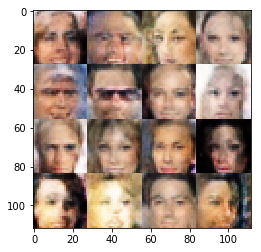

Epoch 1/1... Discriminator Loss: 1.1213... Generator Loss: 0.9807
Epoch 1/1... Discriminator Loss: 1.0007... Generator Loss: 1.1157
Epoch 1/1... Discriminator Loss: 0.9995... Generator Loss: 1.1327
Epoch 1/1... Discriminator Loss: 1.0235... Generator Loss: 1.4404
Epoch 1/1... Discriminator Loss: 0.9049... Generator Loss: 1.5250
Epoch 1/1... Discriminator Loss: 0.9621... Generator Loss: 1.1313
Epoch 1/1... Discriminator Loss: 0.8063... Generator Loss: 1.5423
Epoch 1/1... Discriminator Loss: 1.0229... Generator Loss: 0.9836
Epoch 1/1... Discriminator Loss: 0.9872... Generator Loss: 1.3745
Epoch 1/1... Discriminator Loss: 1.1170... Generator Loss: 1.1568


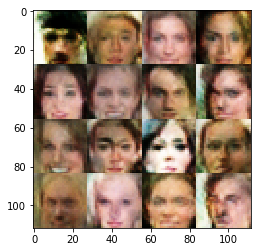

Epoch 1/1... Discriminator Loss: 1.0227... Generator Loss: 1.3980
Epoch 1/1... Discriminator Loss: 0.9282... Generator Loss: 1.3718
Epoch 1/1... Discriminator Loss: 0.9520... Generator Loss: 1.1033
Epoch 1/1... Discriminator Loss: 1.3936... Generator Loss: 0.5753
Epoch 1/1... Discriminator Loss: 0.9415... Generator Loss: 1.3659
Epoch 1/1... Discriminator Loss: 1.0555... Generator Loss: 1.1943
Epoch 1/1... Discriminator Loss: 1.0313... Generator Loss: 1.5367
Epoch 1/1... Discriminator Loss: 1.0169... Generator Loss: 1.2109
Epoch 1/1... Discriminator Loss: 1.0840... Generator Loss: 1.2547
Epoch 1/1... Discriminator Loss: 0.9755... Generator Loss: 0.9585


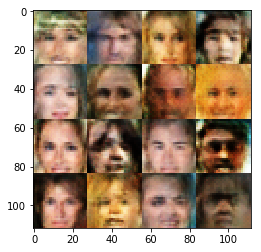

Epoch 1/1... Discriminator Loss: 1.0242... Generator Loss: 1.5079
Epoch 1/1... Discriminator Loss: 1.0759... Generator Loss: 1.2340
Epoch 1/1... Discriminator Loss: 0.9985... Generator Loss: 1.3045
Epoch 1/1... Discriminator Loss: 1.1707... Generator Loss: 0.8163
Epoch 1/1... Discriminator Loss: 1.0528... Generator Loss: 0.9102
Epoch 1/1... Discriminator Loss: 0.9840... Generator Loss: 1.2716
Epoch 1/1... Discriminator Loss: 1.1236... Generator Loss: 0.8260
Epoch 1/1... Discriminator Loss: 0.8628... Generator Loss: 1.3908
Epoch 1/1... Discriminator Loss: 1.0919... Generator Loss: 1.0126
Epoch 1/1... Discriminator Loss: 0.9882... Generator Loss: 0.9623


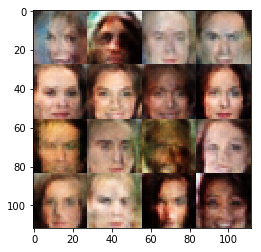

Epoch 1/1... Discriminator Loss: 1.0236... Generator Loss: 0.9775
Epoch 1/1... Discriminator Loss: 1.1707... Generator Loss: 0.9437
Epoch 1/1... Discriminator Loss: 1.0035... Generator Loss: 1.1262
Epoch 1/1... Discriminator Loss: 1.3702... Generator Loss: 0.5589
Epoch 1/1... Discriminator Loss: 1.1575... Generator Loss: 1.1831
Epoch 1/1... Discriminator Loss: 1.0930... Generator Loss: 0.9267


In [43]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.